# About 

*License: CC-BY-NC-SA 4.0*

*Author: Murilo M. Marinho (murilo.marinho@manchester.ac.uk)*

## Pre-requisites
The user of this notebook is expected to have prior knowledge in
- All the content and pre-requisites of lesson 1 notebook.

## I want to know more
- https://github.com/bdaiinstitute/spatialmath-python?tab=readme-ov-file
- https://github.com/bdaiinstitute/spatialmath-python/blob/master/notebooks/gentle-introduction.ipynb
- https://github.com/bdaiinstitute/spatialmath-python/blob/master/notebooks/introduction.ipynb

## I found an issue
Thank you! Please report it at https://github.com/MarinhoLab/OpenExecutableBooksRobotics/issues

## Macros (do not touch these)

$\providecommand{\myvec}[1]{{\mathbf{\boldsymbol{{#1}}}}}$
$\providecommand{\mymatrix}[1]{{\mathbf{\boldsymbol{{#1}}}}}$

# Installing pre-requisites

In [44]:
%pip install roboticstoolbox-python

Note: you may need to restart the kernel to use updated packages.


# Rigid bodies
As briefly defined in the past lecture, if the relative transformation between all points of a given object remain the same regardless of motion, it is a rigid body. 

In other words, it has no flexibility and the motion of the entire body can be prescribed by its *position* and *orientation* with respect to a given *reference frame*.

# Reference frames

Positions/translations and orientations/rotations of objects are always defined with respect to a reference frame. Reference frames can be attached to rigid bodies or at fixed locations in space. The neutral reference frame has the following notation

$$\mathcal{F}.$$

Unless otherwise stated, a given position/orientation/pose is given with respect to that frame. When other frames are needed we usually rely on notations such as $$\mathcal{F}',\mathcal{F}''$$ when frames are sequential or $$\mathcal{F}_a,\mathcal{F}_b$$ when relationships are more complex.

# 2D Position/translation

Positions/translations in 2D can be uniquely defined as any $$\myvec{p} \in \mathbb{R}^2.$$ Hence, if we would like to define 

$$\myvec{p} = \left[\begin{array}{ccc}
         x \\
         y
        \end{array}\right] =\left[\begin{array}{ccc}
         1 \\
         2
        \end{array}\right],$$

we can do so with

<div class="alert alert-block alert-info">
It is common for column and row vectors to not be distinguishable in Python with <b>numpy</b>. That is in general convenient but can cause problems when the dimension is important, so always pay close attention to what each function expects as input or outputs.
</div>

In [45]:
import numpy as np

# In spatialmath, the translation is obtained with a single dimension, so we use that here.
# note that, using our definitions, these represent column vectors
p = np.array([1.0, 2.0])

print(f"p={p}")

p=[1. 2.]


## Composition of translations

Sequential translations, such as 

$$\mathbb{R}^2 \ni \myvec{p}_i = \left[\begin{array}{ccc}
         x_i \\
         y_i
        \end{array}\right],$$

with $$i \in \mathbb{N}$$ can be composed with sequential additions

$$\myvec{p} = \myvec{p}_{0} + \myvec{p}_{1} + \myvec{p}_{2} + \myvec{p}_{3}.$$

In [46]:
import numpy as np

p0 = np.array([1.0, 2.0])
p1 = np.array([2.0, 3.0])
p2 = np.array([3.0, 4.0])
p3 = np.array([4.0, 5.0])
p = p0 + p1 + p2 + p3

print(f"p={p}")

p=[10. 14.]



## Inverse translation

The inverse translation can be obtained by subtractions and the element of no translation is the zero vector, that is, if we unwind all rotations we're back to the origin of the reference frame

$$\myvec{p}' = \myvec{p} - \myvec{p}_{0} - \myvec{p}_{1} - \myvec{p}_{2} - \myvec{p}_{3} = \left[\begin{array}{ccc}
         0 \\
         0
        \end{array}\right].$$

In [47]:
import numpy as np

p0 = np.array([1.0, 2.0])
p1 = np.array([2.0, 3.0])
p2 = np.array([3.0, 4.0])
p3 = np.array([4.0, 5.0])
p = p0 + p1 + p2 + p3

p_ = p - p0 - p1 - p2 - p3

print(f"p_={p_}")

p_=[0. 0.]


# 2D orientation/rotation 

Orientations/rotations in 2D can be defined in many different ways. In this tutorial, we will address the special orthogonal group for two dimensions, i.e., SO(2). As you have learned in theory, the rotations are defined, in this representation, as a matrix

$$\mymatrix{R} \in \mathbb{R}^{2 \times 2},$$

where the identity rotation means no rotation, hence, for any frame $\mathcal{F}_a$,

$$\mymatrix{R}^{a}_{a} = \mymatrix{I}_2.$$

We can directly instanteate SO(2) elements using `spatialmath`. When constructing a default element, it will hold the identity matrix, as shown below

<div class="alert alert-block alert-info">
It is important to know how to use <b>spatialmath</b>, as it will be handy throughout the course. However, you will also be evaluated on your ability to compute these transformations from scratch, without using <b>spatialmath</b>.
</div>

In [48]:
import spatialmath as sm

R = sm.SO2()

print(f"R={R}")

R=   1         0         
   0         1         



The `spatialmath` `SO2` is a class representing SO(2) and instances of it can be used conveniently with other libraries. We can check that the contents of the object represent a matrix created using `numpy` as follows.

In [49]:
import numpy as np 

R_ = np.array([[1, 0], 
               [0, 1]])

if (R.R == R_).all():
    print("R.R and R_ are the same")
else:
    print("R.R and R_ are not the same")

R.R and R_ are the same


Note that 
1. To extract the "raw" rotation matrix from the `spatialmath.SO2` object, we access the property `R`.
2. To compare matrix equality in numpy, we use the `(A == B).all()` syntax, where both `A` and `B` are numpy matrices.

### Plotting SO(2) elements
The encapsulation of SO(2) elements in an object makes it easy for us to plot those elements, for example we can plot multiple SO(2) elements as shown below, 

$$R(\theta) = \left[\begin{array}{ccc}
             \cos{\theta} & -\sin{\theta} \\
             \sin{\theta} & \cos{\theta} 
        \end{array}\right],$$

for instance with $\mymatrix{R}_a \triangleq \mymatrix{R}(\pi/4)$ and $\mymatrix{R}_b \triangleq \mymatrix{R}(\pi)$, we can get a visual representation as follows 

Ra=[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Rb=[[-1.0000000e+00 -1.2246468e-16]
 [ 1.2246468e-16 -1.0000000e+00]]


<Figure size 640x480 with 0 Axes>

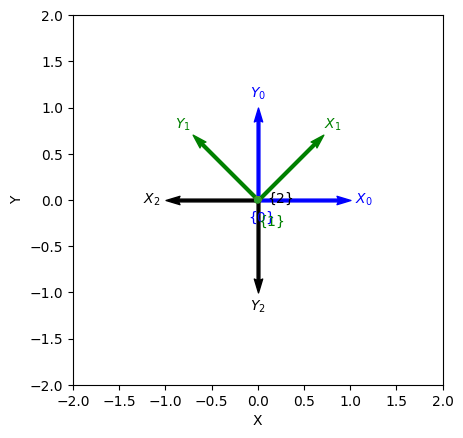

In [50]:
import spatialmath as sm
import matplotlib.pyplot as plt
from math import pi

fig = plt.figure() 

# Frame 0, with the default blue color
R.plot(frame='0', dims=[-2,2])

# Frame 1, colored in green
Ra = sm.SO2(pi/4)
print(f"Ra={Ra.R}")
Ra.plot(frame='1', dims=[-2,2], color='green')

# Frame 2, colored in black
Rb = sm.SO2(pi)
print(f"Rb={Rb.R}")
Rb.plot(frame='2', dims=[-2,2], color='black')

# 2D poses (combined translation/orientation)

2D poses can be represented using elements of SE(2). As you have learned in theory, translations and rotations can be combined into a single $\mymatrix{H}\in\mathbb{R}^{3 \times 3}$ with the following structure

$$\mymatrix{H}(x,y,\theta) = \left[\begin{array}{ccc}
             \cos{\theta} & -\sin{\theta} & x \\
             \sin{\theta} & \cos{\theta}  & y \\
             0            & 0             & 1
        \end{array}\right],$$

where in Python we can define the identity transformation using `spatialmath` as follows

In [51]:
import spatialmath as sm
import matplotlib.pyplot as plt
from math import pi

H = sm.SE2()
print(f"H = {H}")

# If you need parts of the transformation 
print(f"Whose translation is t = {H.t}")
print(f"Whose rotation is R = {H.R}")

H =    1         0         0         
   0         1         0         
   0         0         1         

Whose translation is t = [0. 0.]
Whose rotation is R = [[1. 0.]
 [0. 1.]]


Similarly to SO(2), SE(2) elements can be plotted. For instance, $\mymatrix{H}_a \triangleq \mymatrix{H}(1,2,\frac{\pi}{2})$, $\mymatrix{H}_b \triangleq \mymatrix{H}(-2,-3,\frac{-\pi}{4})$, we have

Ra=[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
t_a=[1. 2.]
Rb=[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
t_b=[-2. -3.]


<Figure size 640x480 with 0 Axes>

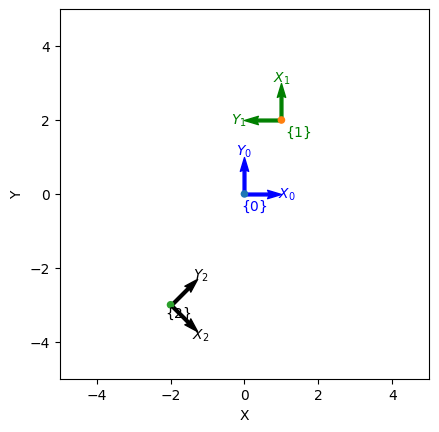

In [52]:
import spatialmath as sm
import matplotlib.pyplot as plt
from math import pi

fig = plt.figure() 

# Frame 0, with the default blue color
H.plot(frame='0', dims=[-5,5])

# Frame 1, colored in green
Ha = sm.SE2(1,2,pi/2)
print(f"Ra={Ha.R}")
print(f"t_a={Ha.t}")
Ha.plot(frame='1', dims=[-5,5], color='green')

# Frame 2, colored in black
Hb = sm.SE2(-2,-3,-pi/4)
print(f"Rb={Hb.R}")
print(f"t_b={Hb.t}")
Hb.plot(frame='2', dims=[-5,5], color='black')

# 3D Position/translation

The 3D position/translations are a trivial extention of the 2D ones with one extra dimension, being defined in $\mathbb{R}^3$. 

$$\mathbb{R}^3 \ni \myvec{p}_i = \left[\begin{array}{ccc}
         x_i \\
         y_i \\
         z_i
        \end{array}\right].$$

This is straightforward and there's nothing surprising in terms of properties, so we will move on to SO(3).

# 3D orientation/rotation 

You have seen the general formulation of rotational matrices in 3D. For rotations about the basis vectors, we have 

$$\mymatrix{R}(z,\theta) = \left[\begin{array}{ccc}
             \cos{\theta} & -\sin{\theta} & 0 \\
             \sin{\theta} & \cos{\theta}  & 0 \\
             0            & 0             & 1
        \end{array}\right],$$

$$\mymatrix{R}(y,\theta) = \left[\begin{array}{ccc}
        \cos{\theta}   & 0 & \sin{\theta} \\
        0              & 1  & 0 \\
        -\sin{\theta}  & 0  & \cos{\theta}
\end{array}\right],$$

$$\mymatrix{R}(x,\theta) = \left[\begin{array}{ccc}
        1   & 0 & 0 \\
        0   &  \cos{\theta}  & -\sin{\theta} \\
        0  & \sin{\theta}  & \cos{\theta}
\end{array}\right].$$

R=[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Rz=[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Ry=[[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]
Rx=[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]


<Figure size 640x480 with 0 Axes>

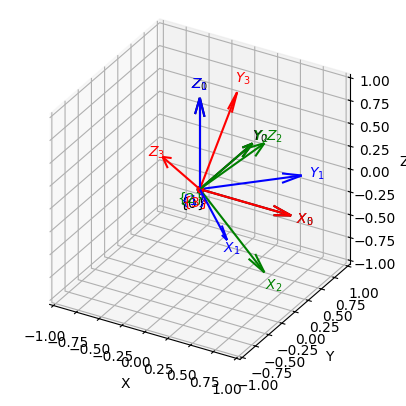

In [53]:
import spatialmath as sm
import matplotlib.pyplot as plt
from math import pi

fig = plt.figure() 

# A neutral rotation
R = sm.SO3()
R.plot(frame='0', dims=[-1,1], color="black")
print(f"R={R.R}")

# A rotation about z
Rz = sm.SO3().Rz(-pi/4)
Rz.plot(frame='1', dims=[-1,1], color='blue')
print(f"Rz={Rz.R}")

# A rotation about y
Ry = sm.SO3().Ry(pi/4)
Ry.plot(frame='2', dims=[-1,1], color='green')
print(f"Ry={Ry.R}")

# A rotation about x
Rx = sm.SO3().Rx(pi/4)
Rx.plot(frame='3', dims=[-1,1], color='red')
print(f"Rx={Rx.R}")

## Compositions of rotations in SO(3)

Compositions of SO(3) follow the same rules as SO(2), where sequential frame transformations as right multiplications

$$\mymatrix{R}_c = \mymatrix{R}_a\mymatrix{R}^a_b\mymatrix{R}^b_c,$$

for instance

Rc=[[ 0.5         0.5         0.70710678]
 [-0.14644661  0.85355339 -0.5       ]
 [-0.85355339  0.14644661  0.5       ]]


<Figure size 640x480 with 0 Axes>

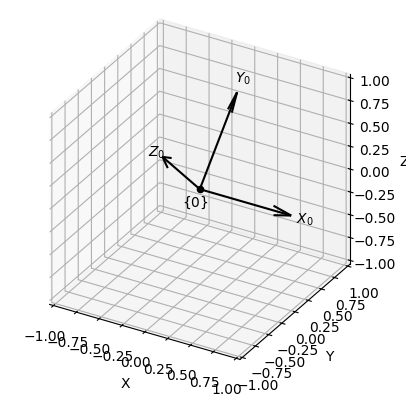

In [54]:
import spatialmath as sm
import matplotlib.pyplot as plt
from math import pi

fig = plt.figure() 

Ra = sm.SO3().Rx(pi/4)
Ra_b = sm.SO3().Ry(pi/4)
Rb_c = sm.SO3().Rz(-pi/4)

Rc = Ra * Ra_b * Rb_c
Rx.plot(frame='0', dims=[-1,1], color='black')
print(f"Rc={Rc.R}")

whereas a similar result using `numpy` is possible but we must be careful with the multiplication operator
<div class="alert alert-block alert-info">
Note that for <b>spatialmath</b>, the regular <b>*</b> product is used, whereas in <b>numpy</b> matrix multiplications would be done with <b>@</b>.
</div>

In [55]:
import spatialmath as sm
import numpy as np
from math import pi

# Spatial math
Ra = sm.SO3().Rx(pi/4)
Ra_b = sm.SO3().Ry(pi/4)
Rb_c = sm.SO3().Rz(-pi/4)
Rc = Ra * Ra_b * Rb_c

# Numpy, using the correct product 
nRa = Ra.R
nRa_b = Ra_b.R
nRb_c = Rb_c.R
nRc = Ra.R @ Ra_b.R @ Rb_c.R

if (Rc.R == nRc).all():
    print('The result is the same!')
else:
    print('The result is different.')


The result is the same!


## Inverse rotations in SO(3)

Inverse operations in SO(3) are analogous to the inversions in SO(2), which are simply matrix transpositions. This is simplified in `spatialmath` with the `inv` operator, as the same operator can be used for all structures.

<div class="alert alert-block alert-info">
Because of carryover effects of sequential fixed floating-point operations, many numbers that analytically are expected to be the same are not effectivelly the same after many operations. In those cases, comparisons with a level of tolerance such as <b>numpy.isclose</b> are more proper.
</div>

In [56]:
import spatialmath as sm
from math import pi

Ra = sm.SO3().Rx(pi/4)
Ra_b = sm.SO3().Ry(pi/4)
Rb_c = sm.SO3().Rz(-pi/4)
Rc = Ra * Ra_b * Rb_c

Ra_ = Rc * Rb_c.inv() * Ra_b.inv() 

if np.isclose(Ra.R, Ra_.R).all():
    print('The results are pretty much the same!')
else:
    print('The results are too different.')


The results are pretty much the same!


# 3D poses

3D poses are represented in SE(3) with matrices $\mymatrix{H}\in\mathbb{R}^{4 \times 4}$ with the following structure

$$\mymatrix{H}(\myvec{t},\mymatrix{R}) = \left[\begin{array}{ccc}
             \mymatrix{R} & \myvec{t} \\
             \myvec{0} & 1 
        \end{array}\right],$$

## Sequential transformations

Using `spatialmath` we can also perform transformations using sequential multiplications, as for SO(3). Note also that we can verify the lack of commutativity on these transformations.

Ra=[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]
t_a=[1. 2. 3.]
Ra_=[[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]
t_a_=[ 1. -3.  2.]
The results are far.


<Figure size 640x480 with 0 Axes>

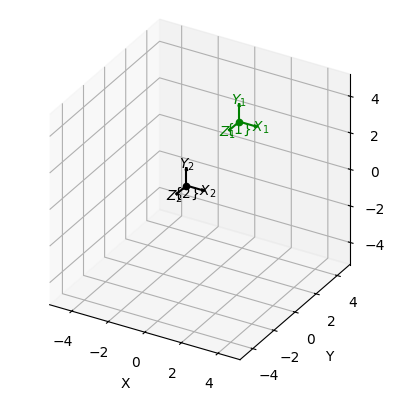

In [57]:
import spatialmath as sm
import matplotlib.pyplot as plt
from math import pi

fig = plt.figure() 

# An SE(3) translation
Ht_a = sm.SE3(1,2,3)

# An SE(3) rotation
Hr_a = sm.SE3.Rx(pi/2)

# Frame 1, colored in green
Ha = Ht_a * Hr_a 
print(f"Ra={Ha.R}")
print(f"t_a={Ha.t}")
Ha.plot(frame='1', dims=[-5,5], color='green')

# Frame 2, colored in black
Ha_ = Hr_a * Ht_a 
print(f"Ra_={Ha_.R}")
print(f"t_a_={Ha_.t}")
Ha_.plot(frame='2', dims=[-5,5], color='black')

if np.isclose(Ha.A,Ha_.A).all():
    print('The results are close!')
else:
    print('The results are far.')

## Inverse transformations

As you have learned in theory, the inverse transformation can be found as

$$\mymatrix{H^-1}(\myvec{t},\mymatrix{R}) = \left[\begin{array}{ccc}
             \mymatrix{R}^T & -\mymatrix{R}^T\myvec{t} \\
             \myvec{0} & 1 
        \end{array}\right],$$

In [58]:
import spatialmath as sm
import matplotlib.pyplot as plt
from math import pi

Ht_a = sm.SE3(1,2,3)
Hr_a = sm.SE3.Rx(pi/2)
Ht_b = sm.SE3(-0.1,0.2,-0.3)
Hr_b = sm.SE3.Ry(-pi/4)

Hb = Ht_a * Hr_a * Ht_b * Hr_b 
Ht_a_ = Hb * Hr_b.inv() * Ht_b.inv() * Hr_a.inv()

if np.isclose(Ht_a.A,Ht_a_.A).all():
    print('The results are close!')
else:
    print('The results are far.')

The results are close!
